# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Let's load the dataset using keras datasets 

In [0]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)


In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# We'll do PCA and reduce dimensionality

In [0]:
# # Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [0]:
# # Visualising the dataset
# plt.scatter(X_train[:,0], X_train[:,1], color = 'red')
# plt.title('Scatter Plot PCA')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.show()


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
N, D = X_train.shape

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (D,)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [0]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')

In [0]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=False)

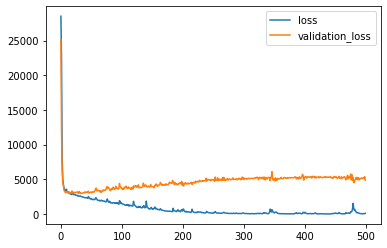

In [37]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

## Great, the model is overfitting, let's try dropout

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (D,)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1)
])

In [44]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=1)


Epoch 1/500
12/12 [==============================] - 0s 10ms/step - loss: 28571.3125 - val_loss: 26409.9160
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 24408.5898 - val_loss: 18710.3535
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 12421.9189 - val_loss: 5661.1973
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 9037.6309 - val_loss: 5078.8105
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 6531.7310 - val_loss: 5547.6958
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 5865.2603 - val_loss: 4853.0127
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 5622.4673 - val_loss: 4353.9478
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 5794.5288 - val_loss: 4475.6191
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 4968.8638 - val_loss: 4421.0063
Epoch 10/500
12/12 [=============================

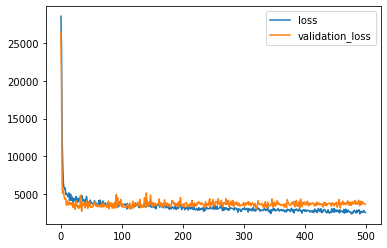

In [45]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()